# Task
The objective of this Project is to analyze a food service dataset to gain insights into
operational eciency and food waste management. The dataset consists of variables
such as the number of meals served, kitchen sta, environmental conditions
(temperature and humidity), and food waste. Our goal is to explore this data, clean it,
visualize key patterns, and derive actionable insights to optimize operations.

# Sub Task

**Load the dataset.**


The EDA process imvolves several steps to clean and analyze data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 **Load the First few rows of dataset.**

In [10]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
#df = pd.read_csv('')

# Assuming your data is in a CSV file named 'Food_data.csv'
df = pd.read_csv('/content/drive/MyDrive/Food_data.csv')  # Load your data into the 'df' DataFrame

# Now you can proceed with your code


print("\nFirst few rows of the DataFrame:")
display(df.head(100))





First few rows of the DataFrame:


ID        date  meals_served kitchen_staff  temperature_C  \
0    0  12/19/2022         196.0            13      27.887273   
1    1  11/21/2023         244.0            15      10.317872   
2    2    2/1/2022         148.0            16      27.714300   
3    3   3/19/2023         157.0            19      19.173902   
4    4   7/18/2022         297.0            10      26.375233   
..  ..         ...           ...           ...            ...   
95  95   4/20/2022         235.0             5      28.047191   
96  96   5/22/2023         448.0             7      19.776069   
97  97   8/24/2024         107.0            12      28.129639   
98  98    8/7/2024         172.0            10      14.221355   
99  99    1/4/2022         206.0            11      15.715629   

    humidity_percent  day_of_week  special_event  past_waste_kg  \
0          45.362854            0            0.0       7.740587   
1          64.430475            1            0.0      42.311779   
2          69.046113            1            0.0      41.184305   
3          46.292823            6            0.0      41.543492   
4          79.741064            0            0.0      26.525097   
..               ...          ...            ...            ...   
95         70.585582            2            0.0      23.673220   
96         53.684061            0            1.0      47.023967   
97         65.825746            5            0.0      12.406967   
98         43.750317            2            0.0      49.696934   
99         74.284147            1            0.0      22.281919   

   staff_experience waste_category  
0      intermediate          dairy  
1               NaN           MeAt  
2          Beginner           MeAt  
3          Beginner           MeAt  
4      Intermediate           MEAT  
..              ...            ...  
95     Intermediate          dairy  
96         Beginner          dairy  
97         Beginner           MeAt  
98     intermediate           MEAT  
99         Beginner           MeAt  

[100 rows x 11 columns]

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1817    False
1818    False
1819    False
1820    False
1821    False
Length: 1822, dtype: bool

# Check Missing Values

In [ ]:
#   Use .isnull() and .sum() to find missing data:
df.isnull().sum()



ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64

In [ ]:
# Check dimensions
print("Shape of the DataFrame:", df.shape)
# Examine data types
print("\nData types of each column:")
print(df.info())

# Descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive statistics for categorical columns:")
print(df.describe())

# Display first few rows
print("\nFirst few rows of the DataFrame:")
display(df.head())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for  col in ['staff_experience', 'waste_category']:  # Example categorical columns
   print(f"\nColumn '{col}':")
   print(df[col].unique())
   print(df[col].value_counts())

Shape of the DataFrame: (1822, 11)

Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1822 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB
None

Descriptive statistics for numerical columns:
                ID  meals_served  temperature_C  humidity_percent  \
count  1822.000000   1790.000000  

ID        date  meals_served kitchen_staff  temperature_C  \
0   0  12/19/2022         196.0            13      27.887273   
1   1  11/21/2023         244.0            15      10.317872   
2   2    2/1/2022         148.0            16      27.714300   
3   3   3/19/2023         157.0            19      19.173902   
4   4   7/18/2022         297.0            10      26.375233   

   humidity_percent  day_of_week special_event  past_waste_kg  \
0         45.362854            0             0       7.740587   
1         64.430475            1             0      42.311779   
2         69.046113            1             0      41.184305   
3         46.292823            6             0      41.543492   
4         79.741064            0             0      26.525097   

  staff_experience waste_category  
0     intermediate          dairy  
1         Beginner           MeAt  
2         Beginner           MeAt  
3         Beginner           MeAt  
4     Intermediate           MEAT


Unique values in categorical columns:

Column 'staff_experience':
['intermediate' 'Beginner' 'Intermediate' 'EXPERT' 'Pro']
staff_experience
Beginner        718
Intermediate    368
intermediate    366
EXPERT          346
Pro              24
Name: count, dtype: int64

Column 'waste_category':
['dairy' 'MeAt' 'MEAT' 'Vegetables' 'GRAINS' nan 'Wheat' 'Barley']
waste_category
MEAT          419
dairy         351
Vegetables    350
MeAt          335
GRAINS        317
Barley         15
Wheat          14
Name: count, dtype: int64


# Percentage of missing values in a column

In [ ]:
#% of missing values in a column
missing_values = df.isnull().sum() # how many missing values in the column
missing_percentage = (missing_values / len(df)) * 100 # len----> no of rows

print("\nMissing Value Percentage:\n", missing_percentage)


Missing Value Percentage:
 ID                   0.000000
date                 0.000000
meals_served         1.756312
kitchen_staff        0.987925
temperature_C        0.000000
humidity_percent     0.878156
day_of_week          0.000000
special_event        0.000000
past_waste_kg        0.878156
staff_experience    18.496158
waste_category       1.152580
dtype: float64


##categorical columns

In [ ]:
#To find the number of unique values
df['staff_experience'].nunique()

5

In [ ]:
df["staff_experience"].isnull().sum()

337

In [ ]:
for col in df.columns:  # Example categorical columns
    print(f"\nColumn '{col}':")
    print(df[col].nunique())
    print(df[col].value_counts())
    print("---------------------------------------------")


Column 'ID':
1822
ID
1821    1
0       1
1       1
2       1
3       1
       ..
18      1
17      1
16      1
15      1
14      1
Name: count, Length: 1822, dtype: int64
---------------------------------------------

Column 'date':
867
date
2/2/2022     4
1/11/2022    4
1/27/2022    4
2/14/2022    4
1/6/2022     4
            ..
4/2/2024     2
9/4/2023     2
1/17/2024    2
3/20/2024    2
6/27/2022    2
Name: count, Length: 867, dtype: int64
---------------------------------------------

Column 'meals_served':
373
meals_served
259.0     46
352.0     14
485.0     14
291.0     14
198.0     13
          ..
117.0      2
4680.0     1
284.0      1
102.0      1
2080.0     1
Name: count, Length: 373, dtype: int64
---------------------------------------------

Column 'kitchen_staff':
17
kitchen_staff
12        143
5         138
10        130
13        127
9         127
15        123
18        121
14        117
7         117
11        116
19        116
6         113
17        108
16        103


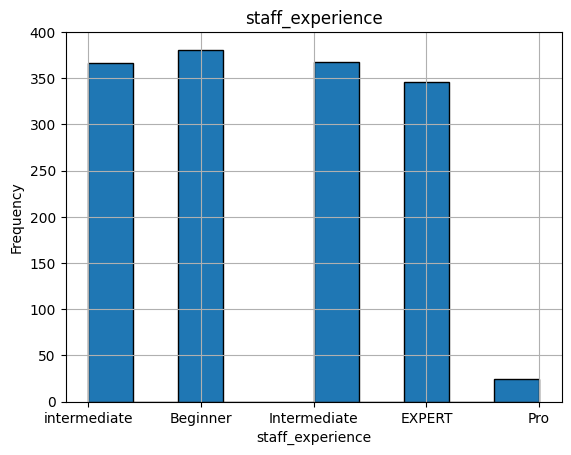

In [ ]:
#Histogram
import matplotlib.pyplot as plt
df['staff_experience'].hist( edgecolor='black')
plt.title('staff_experience')
plt.xlabel('staff_experience')
plt.ylabel('Frequency')
plt.show()


In [ ]:

df['staff_experience'].value_counts()

staff_experience
Beginner        381
Intermediate    368
intermediate    366
EXPERT          346
Pro              24
Name: count, dtype: int64

In [ ]:
#staff experience Column: We can impute the missing values in the 'staff experience' column using the  staff experience.
df['staff_experience'].fillna(df['staff_experience'].mode()[0], inplace=True)
#df['staff_experience'].fillna(df['staff_experience'].median(), inplace=True)



In [ ]:
df.fillna(6)

ID        date  meals_served kitchen_staff  temperature_C  \
0        0  12/19/2022         196.0            13      27.887273   
1        1  11/21/2023         244.0            15      10.317872   
2        2    2/1/2022         148.0            16      27.714300   
3        3   3/19/2023         157.0            19      19.173902   
4        4   7/18/2022         297.0            10      26.375233   
...    ...         ...           ...           ...            ...   
1817  1817   3/29/2022         395.0            18      17.354199   
1818  1818  11/27/2022         483.0            11      24.912137   
1819  1819   4/12/2023         243.0            11      28.870946   
1820  1820   2/14/2022         406.0            10      19.061638   
1821  1821   5/10/2024         350.0             6      23.708015   

      humidity_percent  day_of_week special_event  past_waste_kg  \
0            45.362854            0             0       7.740587   
1            64.430475            1             0      42.311779   
2            69.046113            1             0      41.184305   
3            46.292823            6             0      41.543492   
4            79.741064            0             0      26.525097   
...                ...          ...           ...            ...   
1817         45.138435            1             0      40.550668   
1818         59.485091            6             0      36.470276   
1819         70.508404            2             0      19.767203   
1820         55.286642            0             0      28.560361   
1821         51.351286            4             0      46.786860   

     staff_experience waste_category  
0        intermediate          dairy  
1            Beginner           MeAt  
2            Beginner           MeAt  
3            Beginner           MeAt  
4        Intermediate           MEAT  
...               ...            ...  
1817     Intermediate         GRAINS  
1818     intermediate          dairy  
1819     Intermediate           MeAt  
1820           EXPERT           MEAT  
1821     intermediate     Vegetables  

[1822 rows x 11 columns]

In [ ]:
df.describe()

ID  meals_served  temperature_C  humidity_percent  \
count  1822.000000   1790.000000    1822.000000       1806.000000   
mean    910.500000    373.512849      22.189280         60.791257   
std     526.110413    494.791973       8.919939         17.326232   
min       0.000000    100.000000     -10.372207         30.121111   
25%     455.250000    211.250000      15.684259         46.035158   
50%     910.500000    306.000000      22.115040         61.634935   
75%    1365.750000    407.000000      28.807494         75.789317   
max    1821.000000   4730.000000      60.000000         89.982828   

       day_of_week  past_waste_kg  
count   1822.00000    1806.000000  
mean       3.01427      26.997534  
std        2.00899      12.791891  
min        0.00000       5.008394  
25%        1.00000      15.990760  
50%        3.00000      26.832569  
75%        5.00000      38.116308  
max        6.00000      49.803703

In [ ]:
#To find the number of unique values
df['waste_category'].nunique()

7

In [ ]:


df['waste_category'].mode()

0    MEAT
Name: waste_category, dtype: object

In [ ]:

df['waste_category'].value_counts()

waste_category
MEAT          419
dairy         351
Vegetables    350
MeAt          335
GRAINS        317
Barley         15
Wheat          14
Name: count, dtype: int64

In [ ]:
df['waste_category'].unique()

In [ ]:
#waste_category experience Column: We can impute the missing values in the 'waste_category' column using the median  waste_category experience.
df['waste_category'].fillna(df['waste_category'].mode()[0], inplace=True)


KeyError: 0

In [ ]:
df["waste_category"].isnull().sum()

np.int64(21)

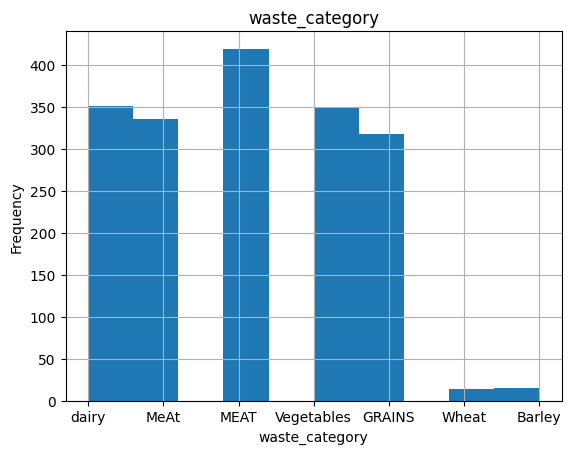

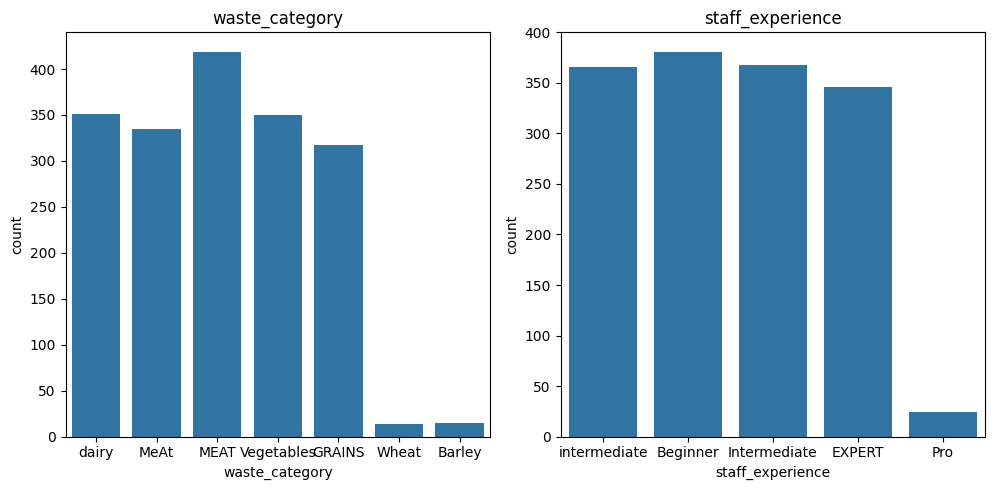

In [ ]:
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns

df['waste_category'].hist( )
plt.title('waste_category')
plt.xlabel('waste_category')
plt.ylabel('Frequency')
plt.show()


# Bar charts for categorical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='waste_category', data=df)
plt.title('waste_category')

plt.subplot(1, 3, 2)
sns.countplot(x='staff_experience', data=df)
plt.title('staff_experience')


plt.tight_layout()
plt.show()

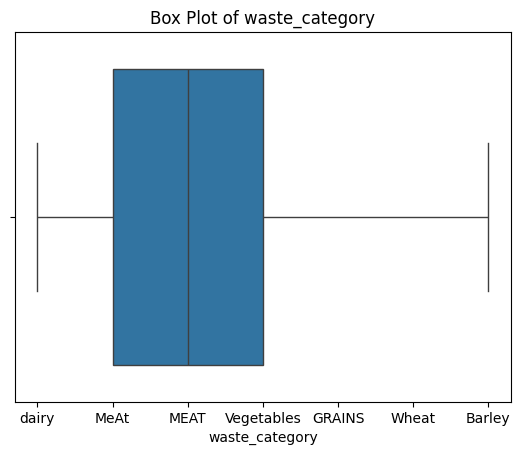

In [ ]:
#Box plot
import seaborn as sns
sns.boxplot(x=df['waste_category']) #
plt.title('Box Plot of waste_category')
plt.show()



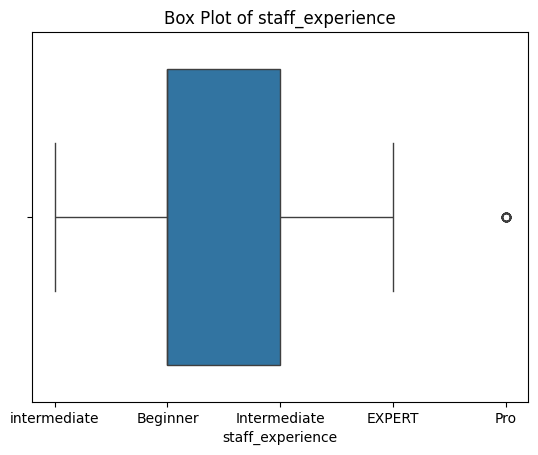

In [ ]:
import seaborn as sns
sns.boxplot(x=df['staff_experience']) #
plt.title('Box Plot of staff_experience')
plt.show()

# **Numerical Data**

In [ ]:
#To find the number of unique values
df['meals_served'].nunique()

373

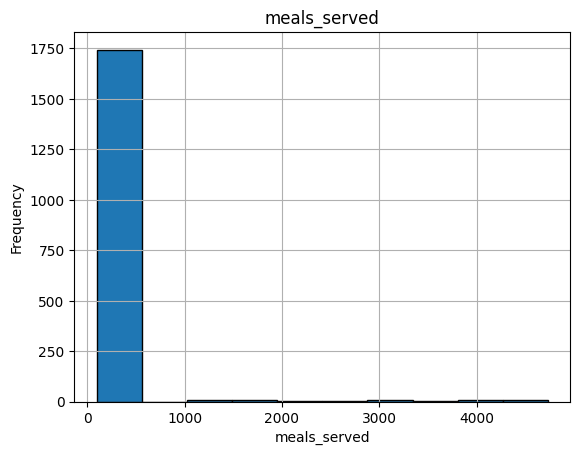

In [ ]:
#Histogram
import matplotlib.pyplot as plt
df['meals_served'].hist( edgecolor='black')
plt.title('meals_served')
plt.xlabel('meals_served')
plt.ylabel('Frequency')
plt.show()

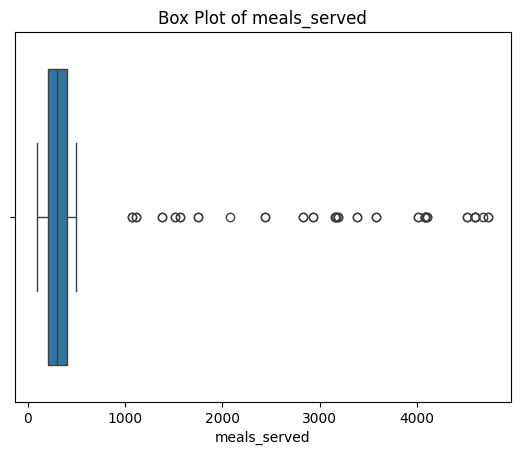

In [ ]:
import seaborn as sns
sns.boxplot(x=df['meals_served'])
plt.title('Box Plot of meals_served')
plt.show()

In [ ]:
df['meals_served'].mean()

np.float64(373.51284916201115)

In [ ]:
df['meals_served'].unique()

array([ 196.,  244.,  148.,  157.,  297.,  241.,  443.,  416.,  439.,
        267.,  487.,  418.,  376.,  372.,  378.,  265., 1560.,  283.,
        138.,  253.,  152., 1110.,  353.,  489.,  464.,  430.,  354.,
         nan,  338.,  358.,  114.,  100.,  259.,  174.,  470.,  262.,
        218.,  272.,  492.,  280.,  317.,  382.,  289.,  361.,  266.,
        119.,  351.,  441.,  385.,  373.,  236.,  326.,  352.,  407.,
        188.,  251.,  205.,  121.,  479.,  483.,  177.,  189.,  294.,
        195.,  357.,  295.,  312.,  485.,  454.,  250.,  212.,  445.,
        200.,  473.,  440.,  384.,  425.,  368.,  444.,  374.,  363.,
        341.,  291.,  202.,  491.,  235.,  448.,  107.,  172.,  206.,
        228.,  134.,  405.,  350.,  273.,  495.,  197.,  269.,  355.,
        256.,  120.,  307.,  383.,  104.,  245.,  426.,  149.,  459.,
        472.,  109., 2930.,  286.,  328.,  468.,  268.,  180.,  279.,
        400.,  456.,  490.,  370.,  217.,  435.,  488.,  122.,  214.,
        348.,  203.,

In [ ]:
#meals_served experience Column: We can impute the missing values in the 'meals_served' column using the median  meals_served experience.
df['meals_served'].fillna(df['meals_served'].mean(), inplace=True)

<ipython-input-18-abcaed7dedea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_served'].fillna(df['meals_served'].mean(), inplace=True)


In [ ]:
df["meals_served"].isnull().sum()

np.int64(32)

In [ ]:
df["meals_served"].value_counts()

meals_served
259.0     14
352.0     14
485.0     14
291.0     14
198.0     13
          ..
117.0      2
4680.0     1
284.0      1
102.0      1
2080.0     1
Name: count, Length: 373, dtype: int64

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

meals_outliers = detect_outliers_iqr(df['meals_served'])


print("\nmeals_served Outliers:\n", meals_outliers)


meals_served Outliers:
 16      1560.0
21      1110.0
129     2930.0
176     3160.0
213     1510.0
244     1380.0
265     2440.0
284     3580.0
318     1070.0
321     3190.0
368     4680.0
380     4100.0
409     1750.0
425     4080.0
443     4080.0
448     4010.0
451     3170.0
520     4510.0
608     2830.0
642     3380.0
687     4730.0
714     4590.0
813     4590.0
927     1560.0
932     1110.0
1040    2930.0
1087    3160.0
1124    1510.0
1155    1380.0
1176    2440.0
1195    3580.0
1196    2080.0
1229    1070.0
1232    3190.0
1291    4100.0
1320    1750.0
1336    4080.0
1354    4080.0
1359    4010.0
1362    3170.0
1431    4510.0
1519    2830.0
1553    3380.0
1598    4730.0
1625    4590.0
1724    4590.0
Name: meals_served, dtype: float64


In [ ]:
display(df.tail(30))

ID       date  meals_served kitchen_staff  temperature_C  \
1792  1792 2024-04-11         182.0             9      11.432006   
1793  1793 2022-09-01         302.0            18      25.138454   
1794  1794 2023-07-21         142.0            14      25.451292   
1795  1795 2024-05-25         393.0            14      34.183904   
1796  1796 2023-07-17         422.0            15      29.567401   
1797  1797 2022-01-26         260.0            10      30.168112   
1798  1798 2023-11-18         464.0             9      33.207938   
1799  1799 2024-08-15         449.0             6      29.964832   
1800  1800 2022-07-09         324.0            13      22.621122   
1801  1801 2024-09-02         313.0             7      30.573961   
1802  1802 2023-12-01         281.0            18      28.704798   
1803  1803 2023-05-26         243.0            17      25.698751   
1804  1804 2023-04-20         219.0            10      21.872164   
1805  1805 2024-05-06         153.0            12      29.296443   
1806  1806 2024-01-18         113.0             7      28.966910   
1807  1807 2022-09-10         297.0            10      10.854694   
1808  1808 2022-01-22         393.0             6      31.003038   
1809  1809 2023-04-05         464.0            16      34.887012   
1810  1810 2022-10-04         366.0             8      13.317866   
1811  1811 2024-08-13         338.0            17      30.509438   
1812  1812 2024-03-16         338.0             9      33.757819   
1813  1813 2022-12-10         329.0            10      30.344157   
1814  1814 2024-02-09         415.0            11      28.085119   
1815  1815 2022-05-11         198.0             6      18.945034   
1816  1816 2024-05-21         202.0             9      14.779768   
1817  1817 2022-03-29         395.0            18      17.354199   
1818  1818 2022-11-27         483.0            11      24.912137   
1819  1819 2023-04-12         243.0            11      28.870946   
1820  1820 2022-02-14         406.0            10      19.061638   
1821  1821 2024-05-10         350.0             6      23.708015   

      humidity_percent  day_of_week special_event  past_waste_kg  \
1792         87.690800            3             0      23.823100   
1793         65.759331            3             1      12.473368   
1794         83.967313            4             0      29.922055   
1795         49.515234            5             0      36.834182   
1796         66.368794            0             0      30.684267   
1797         75.554924            2             0      21.410180   
1798         67.322374            5             0      10.212039   
1799         84.691278            3             0      18.051981   
1800         65.921544            5             0      47.092017   
1801         53.846889            0             0      28.977217   
1802         87.379206            4             1      38.557295   
1803         88.475509            4             0      46.498637   
1804         45.253883            3             0       5.231283   
1805         55.832413            0             0      28.313472   
1806         42.033615            3             0      31.170389   
1807         88.321515            5             1      12.644267   
1808         51.622669            5             0      27.006610   
1809         81.992879            2             0      46.679234   
1810         31.856259            1             0      33.248544   
1811         79.102174            1             0      43.168167   
1812         37.132463            5             0      22.121685   
1813         78.395361            5             0      19.357028   
1814         75.748973            4             0       8.919918   
1815         58.184626            2             0      18.296057   
1816         76.859754            1             0      41.520740   
1817         45.138435            1             0      40.550668   
1818         59.485091            6             0      36.47027

In [ ]:
df.fillna(3)

ID        date  meals_served kitchen_staff  temperature_C  \
0        0  12/19/2022         196.0            13      27.887273   
1        1  11/21/2023         244.0            15      10.317872   
2        2    2/1/2022         148.0            16      27.714300   
3        3   3/19/2023         157.0            19      19.173902   
4        4   7/18/2022         297.0            10      26.375233   
...    ...         ...           ...           ...            ...   
1817  1817   3/29/2022         395.0            18      17.354199   
1818  1818  11/27/2022         483.0            11      24.912137   
1819  1819   4/12/2023         243.0            11      28.870946   
1820  1820   2/14/2022         406.0            10      19.061638   
1821  1821   5/10/2024         350.0             6      23.708015   

      humidity_percent  day_of_week special_event  past_waste_kg  \
0            45.362854            0             0       7.740587   
1            64.430475            1             0      42.311779   
2            69.046113            1             0      41.184305   
3            46.292823            6             0      41.543492   
4            79.741064            0             0      26.525097   
...                ...          ...           ...            ...   
1817         45.138435            1             0      40.550668   
1818         59.485091            6             0      36.470276   
1819         70.508404            2             0      19.767203   
1820         55.286642            0             0      28.560361   
1821         51.351286            4             0      46.786860   

     staff_experience waste_category  
0        intermediate          dairy  
1            Beginner           MeAt  
2            Beginner           MeAt  
3            Beginner           MeAt  
4        Intermediate           MEAT  
...               ...            ...  
1817     Intermediate         GRAINS  
1818     intermediate          dairy  
1819     Intermediate           MeAt  
1820           EXPERT           MEAT  
1821     intermediate     Vegetables  

[1822 rows x 11 columns]

In [ ]:
  # duplicate in data set
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
1817    False
1818    False
1819    False
1820    False
1821    False
Length: 1822, dtype: bool

In [ ]:
df.drop("ID", axis='columns')

date  meals_served kitchen_staff  temperature_C  humidity_percent  \
0    2022-12-19         196.0            13      27.887273         45.362854   
1    2023-11-21         244.0            15      10.317872         64.430475   
2    2022-02-01         148.0            16      27.714300         69.046113   
3    2023-03-19         157.0            19      19.173902         46.292823   
4    2022-07-18         297.0            10      26.375233         79.741064   
...         ...           ...           ...            ...               ...   
1817 2022-03-29         395.0            18      17.354199         45.138435   
1818 2022-11-27         483.0            11      24.912137         59.485091   
1819 2023-04-12         243.0            11      28.870946         70.508404   
1820 2022-02-14         406.0            10      19.061638         55.286642   
1821 2024-05-10         350.0             6      23.708015         51.351286   

      day_of_week special_event  past_waste_kg staff_experience waste_category  
0               0             0       7.740587     intermediate          dairy  
1               1             0      42.311779         Beginner           MeAt  
2               1             0      41.184305         Beginner           MeAt  
3               6             0      41.543492         Beginner           MeAt  
4               0             0      26.525097     Intermediate           MEAT  
...           ...           ...            ...              ...            ...  
1817            1             0      40.550668     Intermediate         GRAINS  
1818            6             0      36.470276     intermediate          dairy  
1819            2             0      19.767203     Intermediate           MeAt  
1820            0             0      28.560361           EXPERT           MEAT  
1821            4             0      46.786860     intermediate     Vegetables  

[1822 rows x 10 columns]

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
print(df['date'].dtype)
print(df['date'].head())


datetime64[ns]
0   2022-12-19
1   2023-11-21
2   2022-02-01
3   2023-03-19
4   2022-07-18
Name: date, dtype: datetime64[ns]


In [ ]:
df.describe()

ID                           date  meals_served  \
count  1822.000000                           1822   1822.000000   
mean    910.500000  2023-04-22 09:30:37.541163520    373.512849   
min       0.000000            2022-01-01 00:00:00    100.000000   
25%     455.250000            2022-07-25 06:00:00    212.250000   
50%     910.500000            2023-04-23 00:00:00    312.500000   
75%    1365.750000            2024-01-07 18:00:00    405.750000   
max    1821.000000            2024-09-26 00:00:00   4730.000000   
std     526.110413                            NaN    490.425273   

       temperature_C  humidity_percent  day_of_week  past_waste_kg  
count    1822.000000       1806.000000   1822.00000    1806.000000  
mean       22.189280         60.791257      3.01427      26.997534  
min       -10.372207         30.121111      0.00000       5.008394  
25%        15.684259         46.035158      1.00000      15.990760  
50%        22.115040         61.634935      3.00000      26.832569  
75%        28.807494         75.789317      5.00000      38.116308  
max        60.000000         89.982828      6.00000      49.803703  
std         8.919939         17.326232      2.00899      12.791891

In [ ]:
df['date'].mean()

Timestamp('2023-04-22 09:30:37.541163520')

In [ ]:
df['date'].mode()

0    2022-01-01
1    2022-01-02
2    2022-01-03
3    2022-01-04
4    2022-01-05
5    2022-01-06
6    2022-01-07
7    2022-01-08
8    2022-01-10
9    2022-01-11
10   2022-01-12
11   2022-01-13
12   2022-01-15
13   2022-01-16
14   2022-01-19
15   2022-01-20
16   2022-01-21
17   2022-01-22
18   2022-01-23
19   2022-01-24
20   2022-01-25
21   2022-01-26
22   2022-01-27
23   2022-01-28
24   2022-01-29
25   2022-01-30
26   2022-01-31
27   2022-02-01
28   2022-02-02
29   2022-02-04
30   2022-02-05
31   2022-02-06
32   2022-02-07
33   2022-02-08
34   2022-02-10
35   2022-02-11
36   2022-02-12
37   2022-02-13
38   2022-02-14
39   2022-02-15
40   2022-02-16
41   2022-02-17
42   2022-02-18
43   2022-02-19
Name: date, dtype: datetime64[ns]

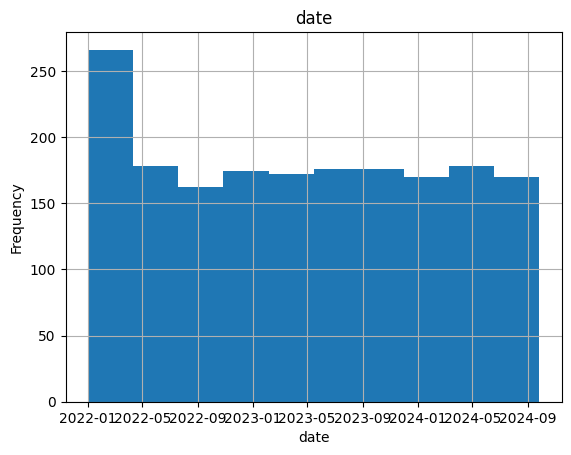

In [ ]:
#Histogram
import matplotlib.pyplot as plt
df['date'].hist( )
plt.title('date')
plt.xlabel('date')
plt.ylabel('Frequency')
plt.show()

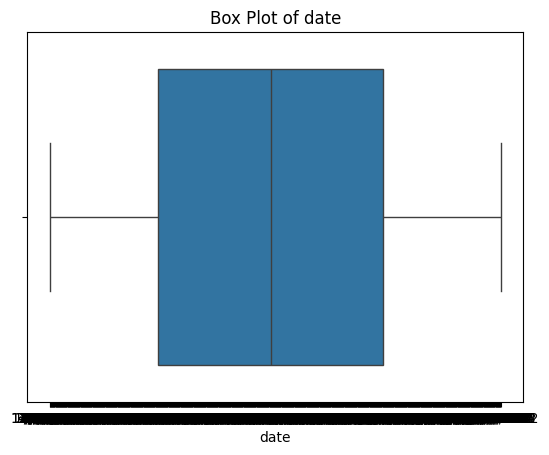

In [ ]:
import seaborn as sns
sns.boxplot(x=df['date'])
plt.title('Box Plot of date')
plt.show()

In [ ]:
df.describe()

ID                           date  meals_served  \
count  1822.000000                           1822   1822.000000   
mean    910.500000  2023-04-22 09:30:37.541163520    373.512849   
min       0.000000            2022-01-01 00:00:00    100.000000   
25%     455.250000            2022-07-25 06:00:00    212.250000   
50%     910.500000            2023-04-23 00:00:00    312.500000   
75%    1365.750000            2024-01-07 18:00:00    405.750000   
max    1821.000000            2024-09-26 00:00:00   4730.000000   
std     526.110413                            NaN    490.425273   

       temperature_C  humidity_percent  day_of_week  past_waste_kg  
count    1822.000000       1806.000000   1822.00000    1806.000000  
mean       22.189280         60.791257      3.01427      26.997534  
min       -10.372207         30.121111      0.00000       5.008394  
25%        15.684259         46.035158      1.00000      15.990760  
50%        22.115040         61.634935      3.00000      26.832569  
75%        28.807494         75.789317      5.00000      38.116308  
max        60.000000         89.982828      6.00000      49.803703  
std         8.919939         17.326232      2.00899      12.791891

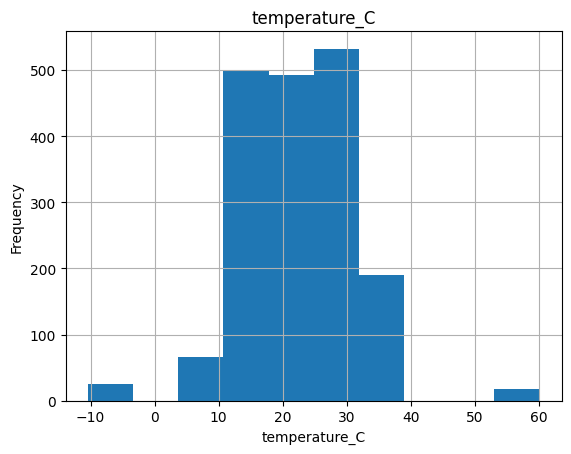

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['temperature_C'].hist()
plt.title('temperature_C')
plt.xlabel('temperature_C')
plt.ylabel('Frequency')
plt.show()

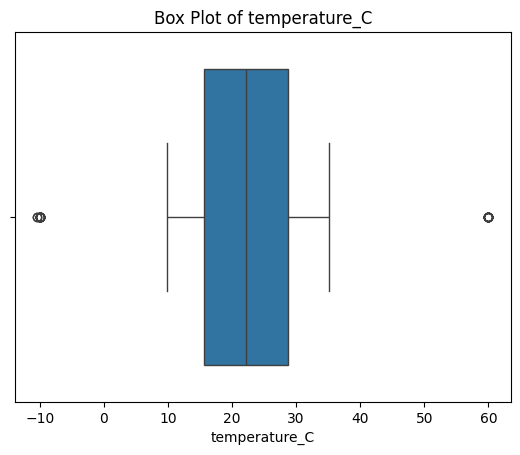

In [ ]:
import seaborn as sns
sns.boxplot(x=df['temperature_C'])
plt.title('Box Plot of temperature_C')
plt.show()

In [ ]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

temp_outliers = detect_outliers_iqr(df['temperature_C'])


print("\n temperature_C Outliers:\n", temp_outliers)


 temperature_C Outliers:
 12     -10.372207
102    -10.000000
238    -10.000000
290     60.000000
300     60.000000
345    -10.000000
384    -10.000000
396     60.000000
404     60.000000
407    -10.000000
445    -10.000000
463    -10.000000
492    -10.000000
537     60.000000
560     60.000000
641     60.000000
701    -10.000000
710    -10.000000
766     60.000000
768    -10.000000
804     60.000000
852    -10.000000
923    -10.372207
1013   -10.000000
1149   -10.000000
1201    60.000000
1211    60.000000
1256   -10.000000
1295   -10.000000
1307    60.000000
1315    60.000000
1318   -10.000000
1356   -10.000000
1374   -10.000000
1403   -10.000000
1448    60.000000
1471    60.000000
1552    60.000000
1612   -10.000000
1621   -10.000000
1677    60.000000
1679   -10.000000
1715    60.000000
1763   -10.000000
Name: temperature_C, dtype: float64


In [ ]:
df["humidity_percent"].isnull().sum()

np.int64(16)

In [ ]:
df["humidity_percent"].nunique()

867

In [ ]:
df["humidity_percent"].unique()

array([45.36285391, 64.43047525, 69.04611285, 46.29282284, 79.74106395,
       79.2859195 , 77.32813583, 75.78650182, 43.39580313, 89.40518256,
       53.39234118, 82.53067359, 54.49838057, 63.6524678 , 68.06038438,
       63.32972545, 48.59999623, 36.07559488, 67.67960296, 42.37304431,
       48.53006544, 58.40405289, 56.99053248, 70.64323929, 73.81476883,
       58.58900303, 74.99104587, 56.31230931, 48.36824045, 68.06544872,
       62.44407403, 38.25142649, 30.6054364 , 74.34159347, 73.84908172,
       84.9154311 , 58.00692463, 31.85147426, 32.85847545, 59.68051138,
       76.88093044, 50.4243506 , 36.9442564 , 69.52950421, 63.89906146,
       72.46129958, 56.9450847 , 74.2841474 , 72.653083  , 65.42586539,
       66.06616174, 70.90491865, 57.51587661, 88.36657937, 89.4757936 ,
       33.63773556, 49.98209231, 62.86708166, 54.94785004, 43.81505524,
       48.89517532, 61.18225577, 54.16586391, 69.89967097, 53.13681077,
       62.90292217, 40.56572828, 43.60364294, 73.53763202, 56.47

In [ ]:
df['humidity_percent'].mean()

np.float64(60.791256687015505)

In [ ]:
df['humidity_percent'].median()

61.63493525

In [ ]:
df['humidity_percent'].value_counts()

humidity_percent
60.791257    16
74.284147     4
80.624240     4
58.744204     4
36.380624     4
             ..
61.633571     1
48.719041     1
61.352383     1
67.925390     1
65.759331     1
Name: count, Length: 868, dtype: int64

In [ ]:
# humidity percent experience Column: We can impute the missing values in the 'meals_served' column using the median  meals_served experience.
df['humidity_percent'].fillna(df['humidity_percent'].mean(), inplace=True)

<ipython-input-10-73425478f2fa>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity_percent'].fillna(df['humidity_percent'].mean(), inplace=True)


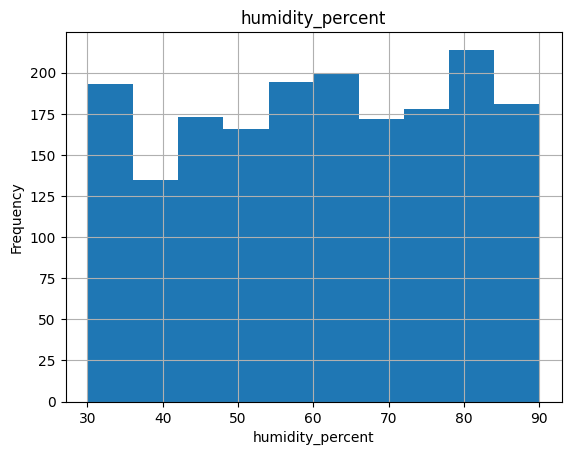

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['humidity_percent'].hist()
plt.title('humidity_percent')
plt.xlabel('humidity_percent')
plt.ylabel('Frequency')
plt.show()



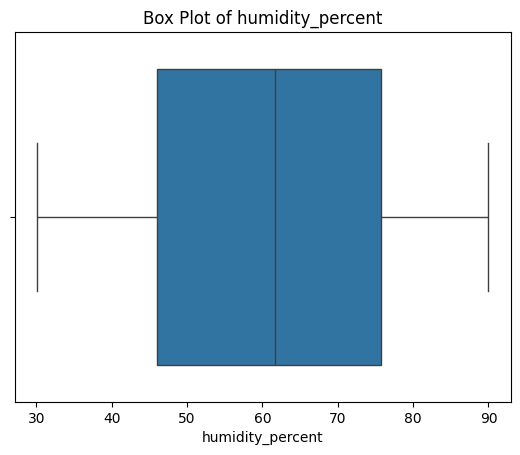

In [ ]:
import seaborn as sns
sns.boxplot(x=df['humidity_percent'])
plt.title('Box Plot of humidity_percent')

In [ ]:
df['past_waste_kg'].nunique()

16

In [ ]:
df['past_waste_kg'].unique()

array([ 7.74058699, 42.31177881, 41.18430513, 41.5434925 , 26.52509668,
       11.83487776, 22.86265878, 34.59944225, 17.45914863, 23.06739248,
       41.07579319, 25.04342845, 36.25941978, 49.63501382, 41.14602071,
       26.92454031, 11.25509923,  7.65976194, 21.02418883,  6.58468281,
       27.15630366, 38.87818951, 22.96250575, 17.26927913, 36.51943096,
       23.69813284, 13.9735219 , 28.56485372, 18.20906566, 43.68558133,
       43.56339866, 25.34389686, 15.80987449, 11.18127857, 49.73367446,
       29.18032236, 34.51564909, 34.77667305, 30.91036382, 14.92289542,
       14.55285388, 46.58484722,  5.65552196, 29.77122997, 29.566559  ,
       39.71804279, 25.59088995, 22.28191873,         nan, 41.55467811,
        7.57896395, 41.72355691,  8.08918998, 34.33553895,  5.9459498 ,
       29.0735003 , 14.91435944, 13.27030993, 35.44900857, 17.57503883,
        8.64673747, 17.58363433, 42.34195691, 16.29006424, 49.15317015,
       19.02072828, 35.33078907, 28.2054448 , 38.72205575, 23.55

In [ ]:
df['past_waste_kg'].value_counts()

past_waste_kg
34.982054    4
41.551615    4
7.961529     4
48.955747    4
34.997769    4
            ..
10.981762    1
31.514658    1
40.841798    1
38.756895    1
21.938673    1
Name: count, Length: 867, dtype: int64

In [ ]:
df['past_waste_kg'].mean()

np.float64(26.997533876241413)

In [ ]:
df['past_waste_kg'].median()

26.832568600000002

In [ ]:
df['past_waste_kg'].fillna(df['past_waste_kg'].mean(), inplace=True)

<ipython-input-23-9bc29ad5ae10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['past_waste_kg'].fillna(df['past_waste_kg'].mean(), inplace=True)


In [ ]:
df.describe()

ID  meals_served  kitchen_staff  temperature_C  \
count  1822.000000   1790.000000     1822.00000    1822.000000   
mean    910.500000    373.512849       11.90990      22.189280   
std     526.110413    494.791973        4.26944       8.919939   
min       0.000000    100.000000        5.00000     -10.372207   
25%     455.250000    211.250000        8.00000      15.684259   
50%     910.500000    306.000000       12.00000      22.115040   
75%    1365.750000    407.000000       15.00000      28.807494   
max    1821.000000   4730.000000       19.00000      60.000000   

       humidity_percent  day_of_week  past_waste_kg  
count       1806.000000   1822.00000    1822.000000  
mean          60.791257      3.01427      26.997534  
std           17.326232      2.00899      12.735569  
min           30.121111      0.00000       5.008394  
25%           46.035158      1.00000      16.148956  
50%           61.634935      3.00000      26.997534  
75%           75.789317      5.00000      37.978663  
max           89.982828      6.00000      49.803703

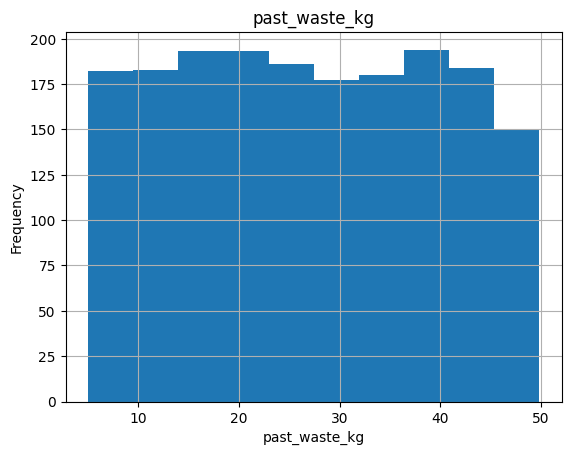

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['past_waste_kg'].hist()
plt.title('past_waste_kg')
plt.xlabel('past_waste_kg')
plt.ylabel('Frequency')
plt.show()



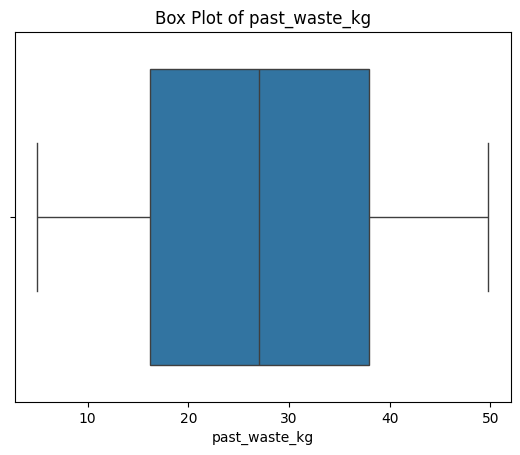

In [ ]:
import seaborn as sns
sns.boxplot(x=df['past_waste_kg'])
plt.title('Box Plot of past_waste_kg')
plt.show()

In [ ]:
#To find the number of unique values
df['kitchen_staff'].nunique()

17

In [ ]:
import pandas as pd
# Convert the 'kitchen_staff' column to numeric type.
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')

# Now calculate the median
df['kitchen_staff'].median()

12.0

In [ ]:
df['kitchen_staff'].mean()

np.float64(11.909899888765295)

In [ ]:
df['kitchen_staff'].value_counts()

kitchen_staff
12        143
5         138
10        130
13        127
9         127
15        123
18        121
14        117
7         117
11        116
19        116
6         113
17        108
16        103
8          99
ten         4
eleven      2
Name: count, dtype: int64

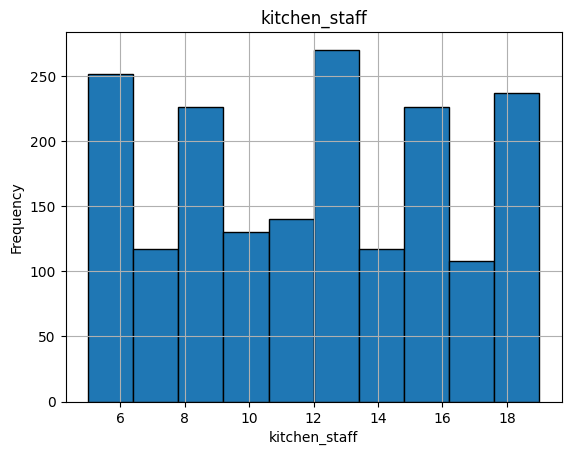

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['kitchen_staff'].hist( edgecolor='black')
plt.title('kitchen_staff')
plt.xlabel('kitchen_staff')
plt.ylabel('Frequency')
plt.show()








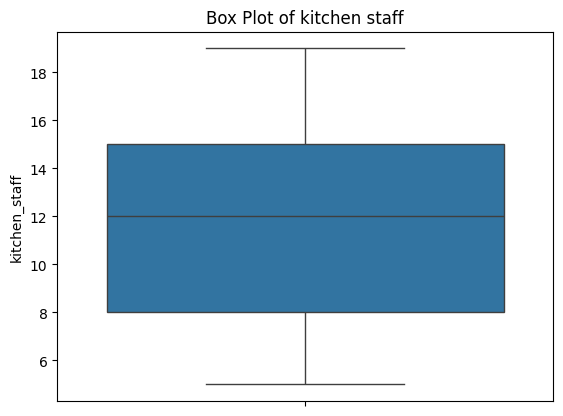

In [ ]:
sns.boxplot(y=df['kitchen_staff']) #verticle orientation
plt.title('Box Plot of kitchen staff')
plt.show()

In [ ]:


df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')  # Convert 'kitchen_staff' to numeric
df['kitchen_staff'].fillna(df['kitchen_staff'].mean(), inplace=True)  # Impute missing values with the mean

<ipython-input-9-3e1c838a5fc6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['kitchen_staff'].fillna(df['kitchen_staff'].mean(), inplace=True)  # Impute missing values with the mean


In [ ]:
# Convert 'kitchen_staff' to numeric before outlier detection
df['kitchen_staff'] = pd.to_numeric(df['kitchen_staff'], errors='coerce')
# Check for outliers (using IQR method for numerical continous features)
# Exclude categorical features from outlier detection
numerical_features = ['meals_served', 'temperature_C', 'humidity_percent', 'past_waste_kg', 'kitchen_staff']
for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nNumber of outliers in {col}: {len(outliers)}")
    # Display a few outlier examples
    display(outliers[[col]].head())


Number of outliers in meals_served: 46


meals_served
16         1560.0
21         1110.0
129        2930.0
176        3160.0
213        1510.0


Number of outliers in temperature_C: 44


temperature_C
12      -10.372207
102     -10.000000
238     -10.000000
290      60.000000
300      60.000000


Number of outliers in humidity_percent: 0


Empty DataFrame
Columns: [humidity_percent]
Index: []


Number of outliers in past_waste_kg: 0


Empty DataFrame
Columns: [past_waste_kg]
Index: []


Number of outliers in kitchen_staff: 0


Empty DataFrame
Columns: [kitchen_staff]
Index: []

In [ ]:
df.describe()

ID  meals_served  kitchen_staff  temperature_C  \
count  1822.000000   1790.000000     1822.00000    1822.000000   
mean    910.500000    373.512849       11.90990      22.189280   
std     526.110413    494.791973        4.26944       8.919939   
min       0.000000    100.000000        5.00000     -10.372207   
25%     455.250000    211.250000        8.00000      15.684259   
50%     910.500000    306.000000       12.00000      22.115040   
75%    1365.750000    407.000000       15.00000      28.807494   
max    1821.000000   4730.000000       19.00000      60.000000   

       humidity_percent  day_of_week  past_waste_kg  
count       1806.000000   1822.00000    1806.000000  
mean          60.791257      3.01427      26.997534  
std           17.326232      2.00899      12.791891  
min           30.121111      0.00000       5.008394  
25%           46.035158      1.00000      15.990760  
50%           61.634935      3.00000      26.832569  
75%           75.789317      5.00000      38.116308  
max           89.982828      6.00000      49.803703

In [ ]:
df['day_of_week'].nunique()

7

In [ ]:
df['day_of_week'].unique()

array([0, 1, 6, 3, 5, 4, 2])

In [ ]:
df['day_of_week'].value_counts()

day_of_week
6    266
5    266
2    264
0    262
3    256
1    254
4    254
Name: count, dtype: int64

In [ ]:
df['day_of_week'].mean()

np.float64(3.0142700329308454)

In [ ]:
df['day_of_week'].median()

3.0

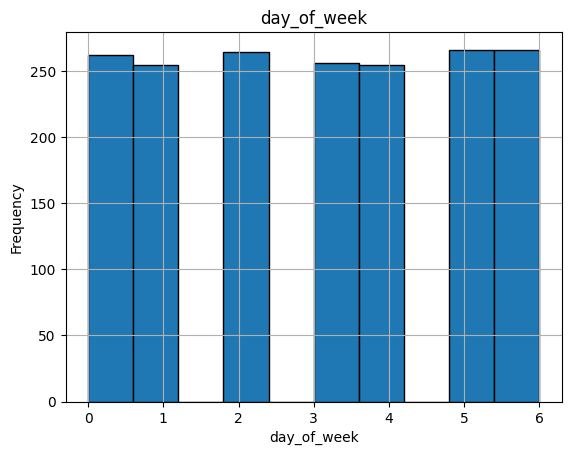

In [ ]:
import matplotlib.pyplot as plt

df['day_of_week'].hist( edgecolor='black')
plt.title('day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Box Plot of day of week')

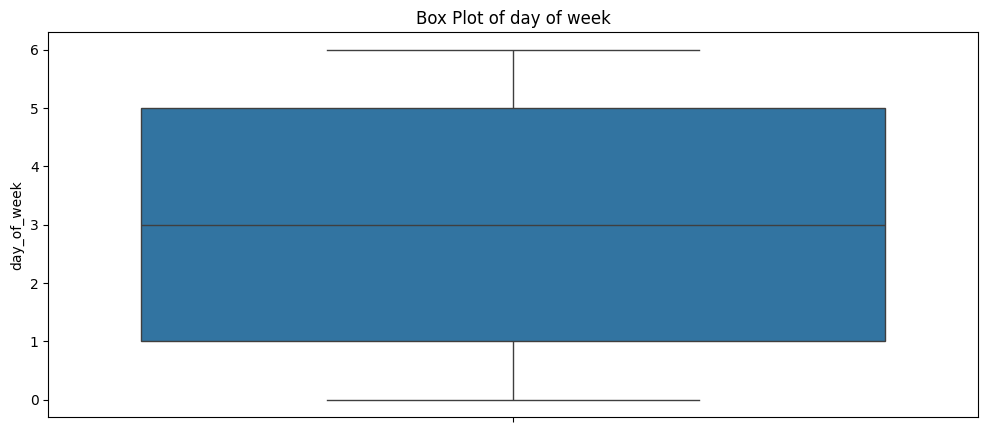

In [ ]:
import seaborn as sns
# Box plots for day of week
plt.figure(figsize=(12, 5))

sns.boxplot(y=df['day_of_week'])
plt.title('Box Plot of day of week')

In [ ]:

df['special_event'].nunique()

3

In [ ]:
df['special_event'].unique()

array(['0', '1', 'One '], dtype=object)

In [11]:
import pandas as pd


# Now you can proceed with your code
df['special_event'] = pd.to_numeric(df['special_event'], errors='coerce')
df['special_event'].median()

0.0

In [12]:
df['special_event'].mean()

np.float64(0.08158765159867695)

In [13]:
df['special_event'].fillna(df['special_event'].mean(), inplace=True)  # Impute missing values with the mean

<ipython-input-13-eb71bc8edc59>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['special_event'].fillna(df['special_event'].mean(), inplace=True)  # Impute missing values with the mean


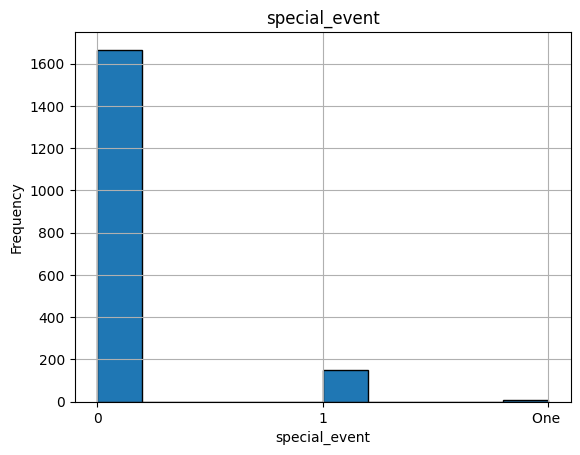

In [ ]:
import matplotlib.pyplot as plt

df['special_event'].hist( edgecolor='black')
plt.title('special_event')
plt.xlabel('special_event')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Box Plot of special event')

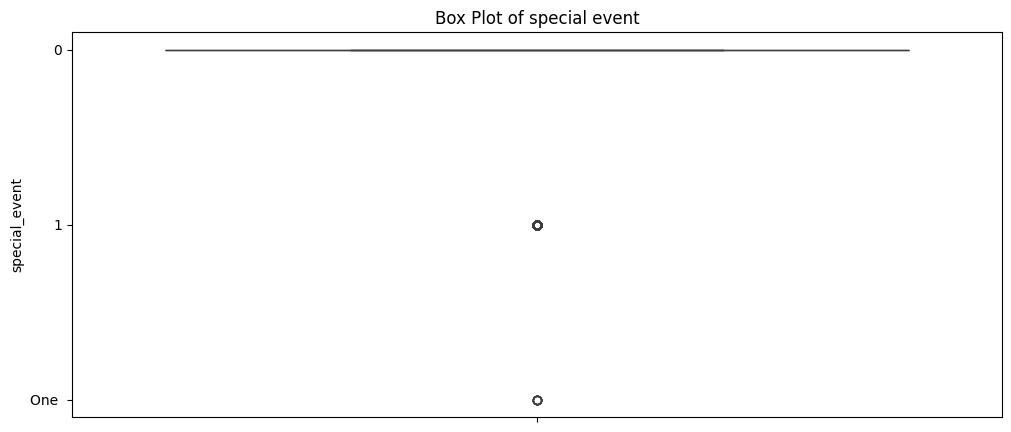

In [ ]:
import seaborn as sns
# Box plots for special event
plt.figure(figsize=(12, 5))

sns.boxplot(y=df['special_event'])
plt.title('Box Plot of special event')

##  The data cleaning is done. The next step is to perform univariate analysis.

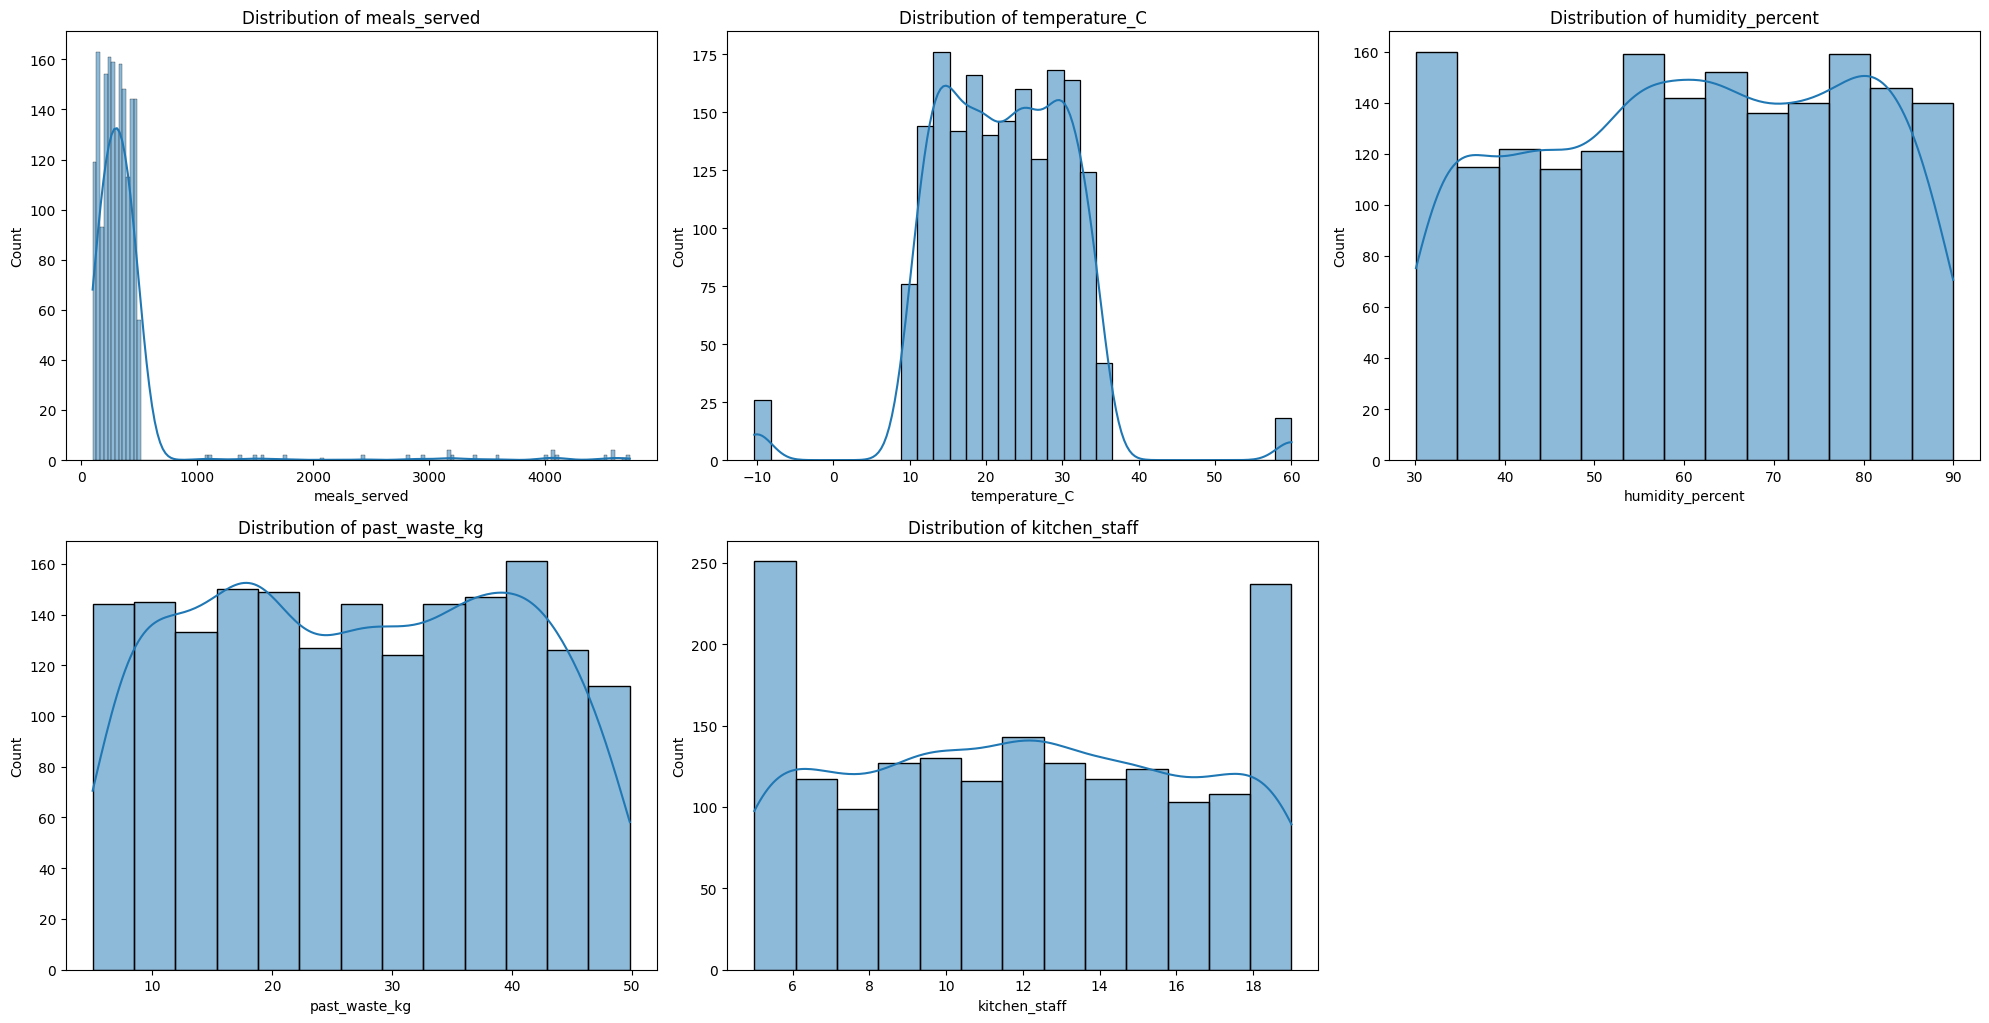

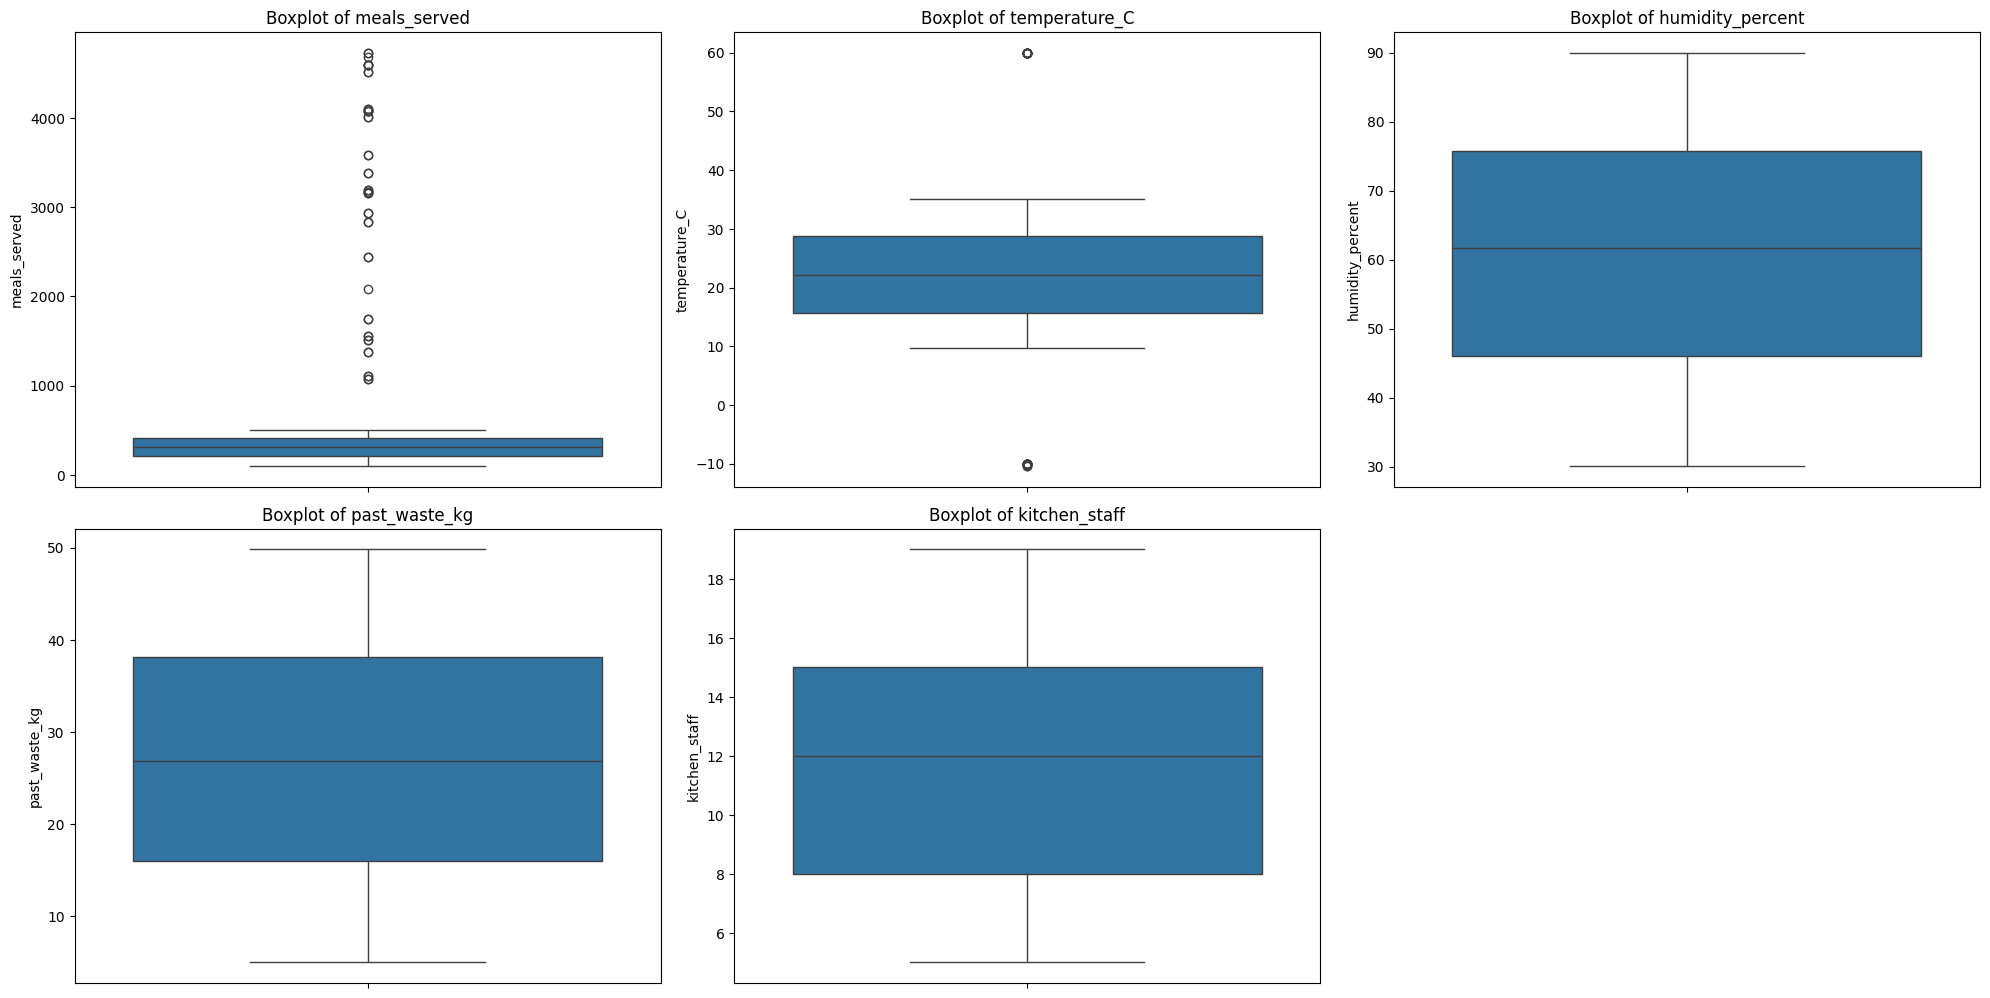

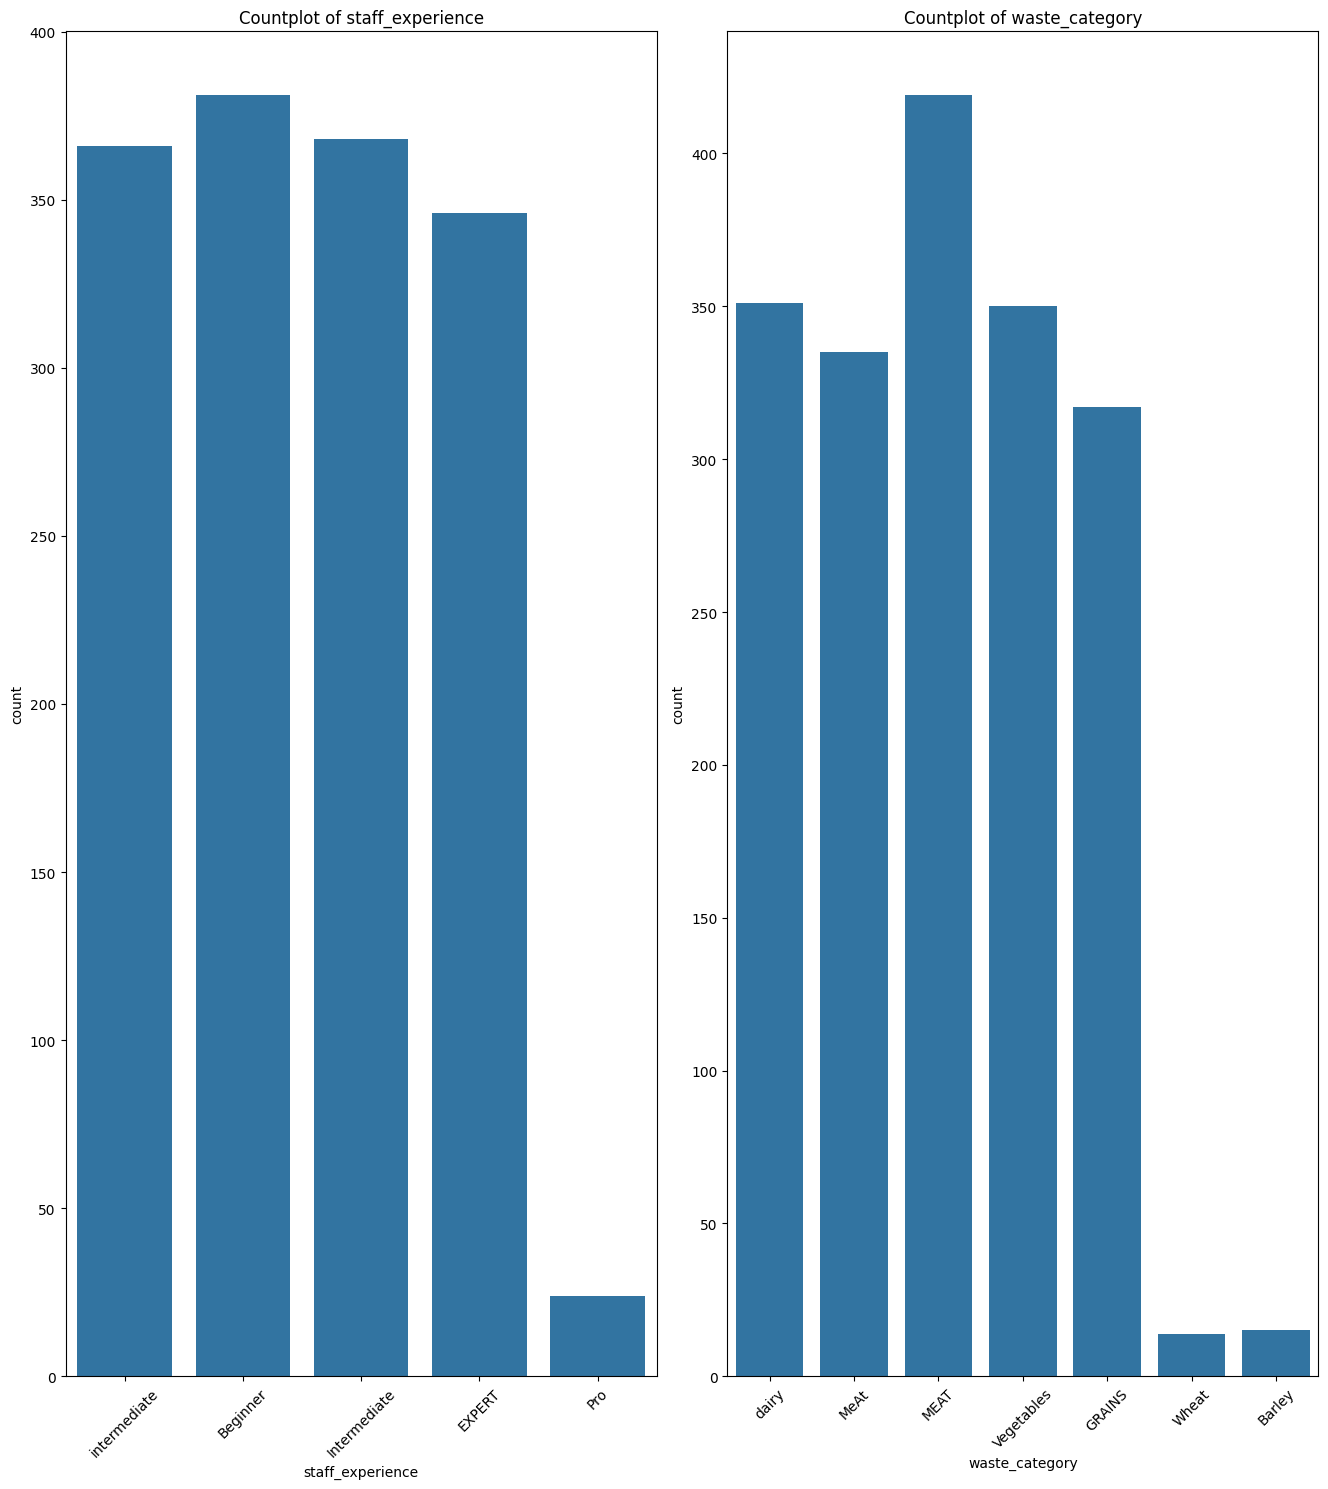

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis: Histograms for numerical features
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Univariate Analysis: Boxplots for numerical features to visualize the distribution of the data.
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Univariate Analysis: Countplots for categorical features
plt.figure(figsize=(20, 15))
categorical_cols = ['staff_experience', 'waste_category']
for i, col in enumerate(categorical_cols):
  plt.subplot(1,3,i+1)
  sns.countplot(x=df[col])
  plt.xticks(rotation=45)
  plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# correlation matrix
cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']
#convert all columns to numeric , corecing errors to nan
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    #drop row with any Nan values in those columns
    df_corr= df[cols].dropna()
#calculate the correlation matrix
corr_matrix=df_corr.corr()
print(corr_matrix)

                  meals_served  kitchen_staff  temperature_C  \
meals_served          1.000000      -0.029083      -0.023546   
kitchen_staff        -0.029083       1.000000      -0.012777   
temperature_C        -0.023546      -0.012777       1.000000   
humidity_percent     -0.035805      -0.016925      -0.012857   
past_waste_kg        -0.066949      -0.083307      -0.023416   

                  humidity_percent  past_waste_kg  
meals_served             -0.035805      -0.066949  
kitchen_staff            -0.016925      -0.083307  
temperature_C            -0.012857      -0.023416  
humidity_percent          1.000000       0.015500  
past_waste_kg             0.015500       1.000000  


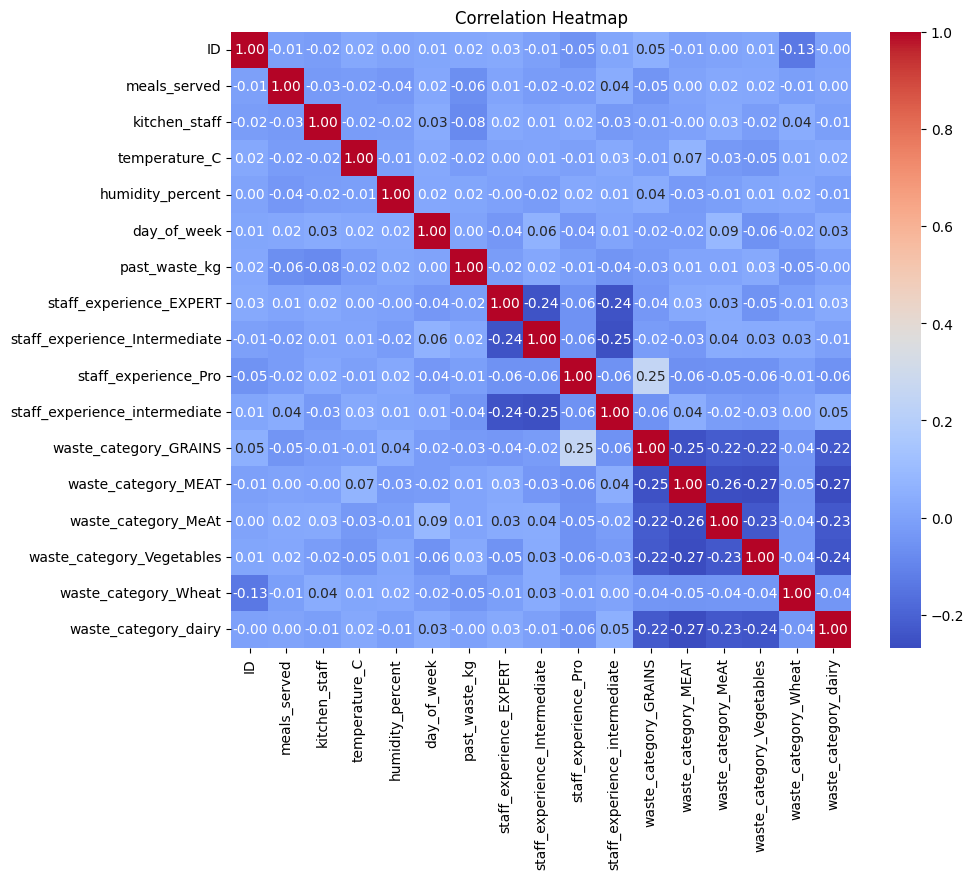

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#correlation of dataset
cols = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'past_waste_kg']
corr_matrix=df[cols].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# Univariate analysis is done. The next step is to perform bivariate analysis.

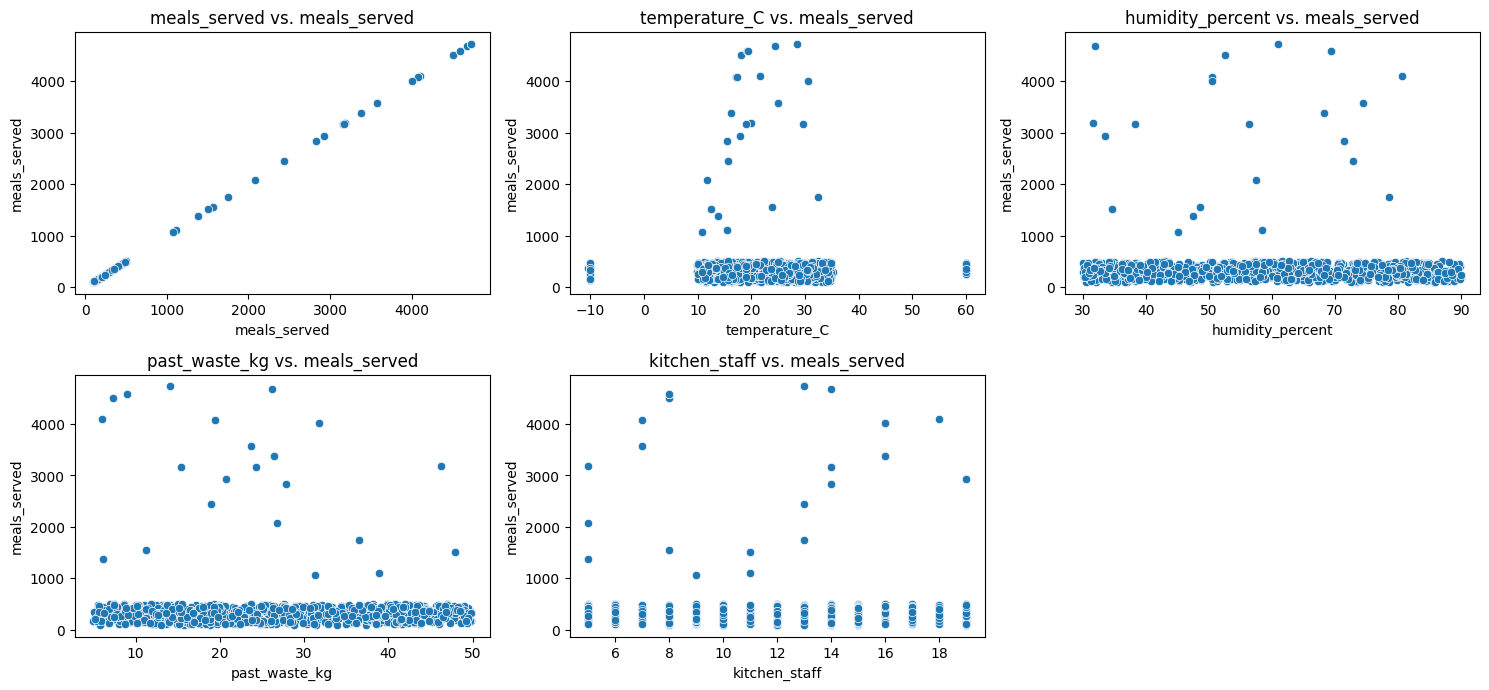

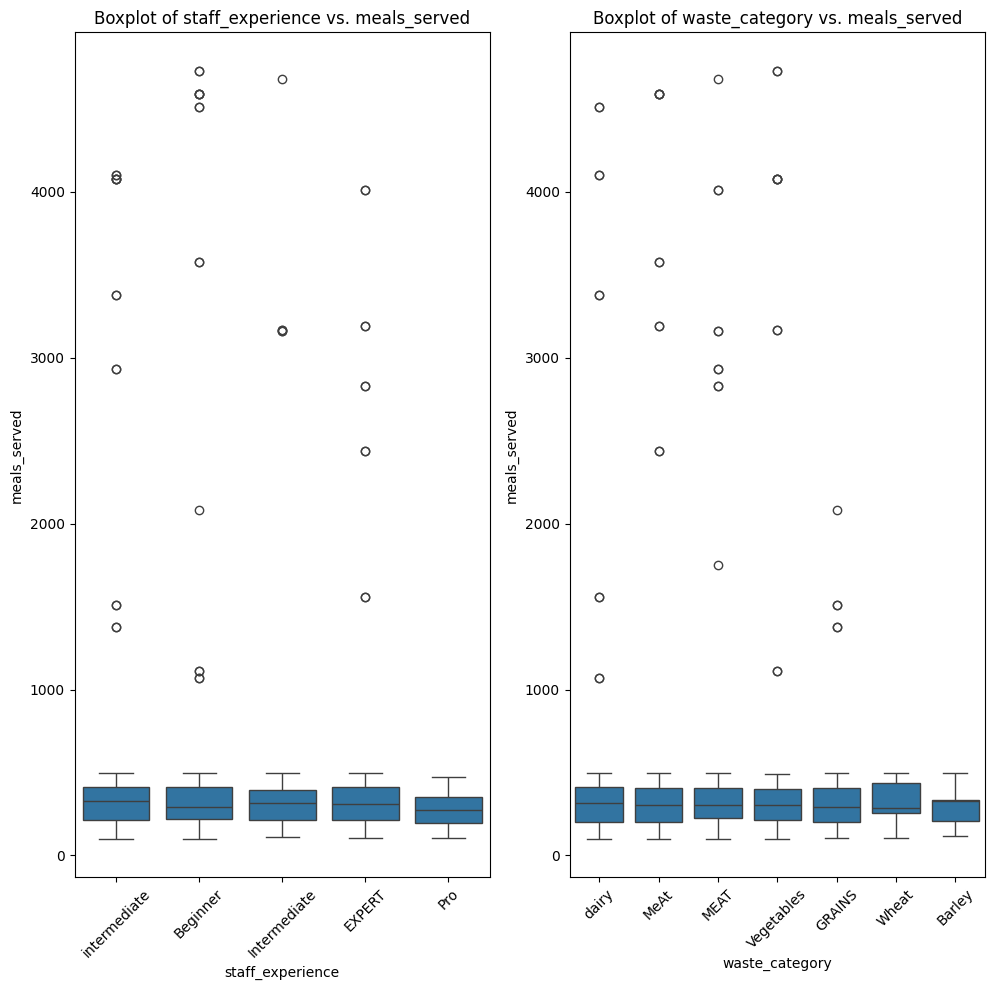

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(15, 10))

# Scatter plots for numerical features vs. Meals served
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.scatterplot(x=df[col], y=df['meals_served'])
    plt.title(f'{col} vs. meals_served')
plt.tight_layout()
plt.show()


# Boxplots for categorical features vs. price
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], y=df['meals_served'])
    plt.xticks(rotation=45)
    plt.title(f'Boxplot of {col} vs. meals_served')

plt.tight_layout()
plt.show()


### Bivariate analysis is complete. Now, I will perform multivariate analysis and then encode categorical features.

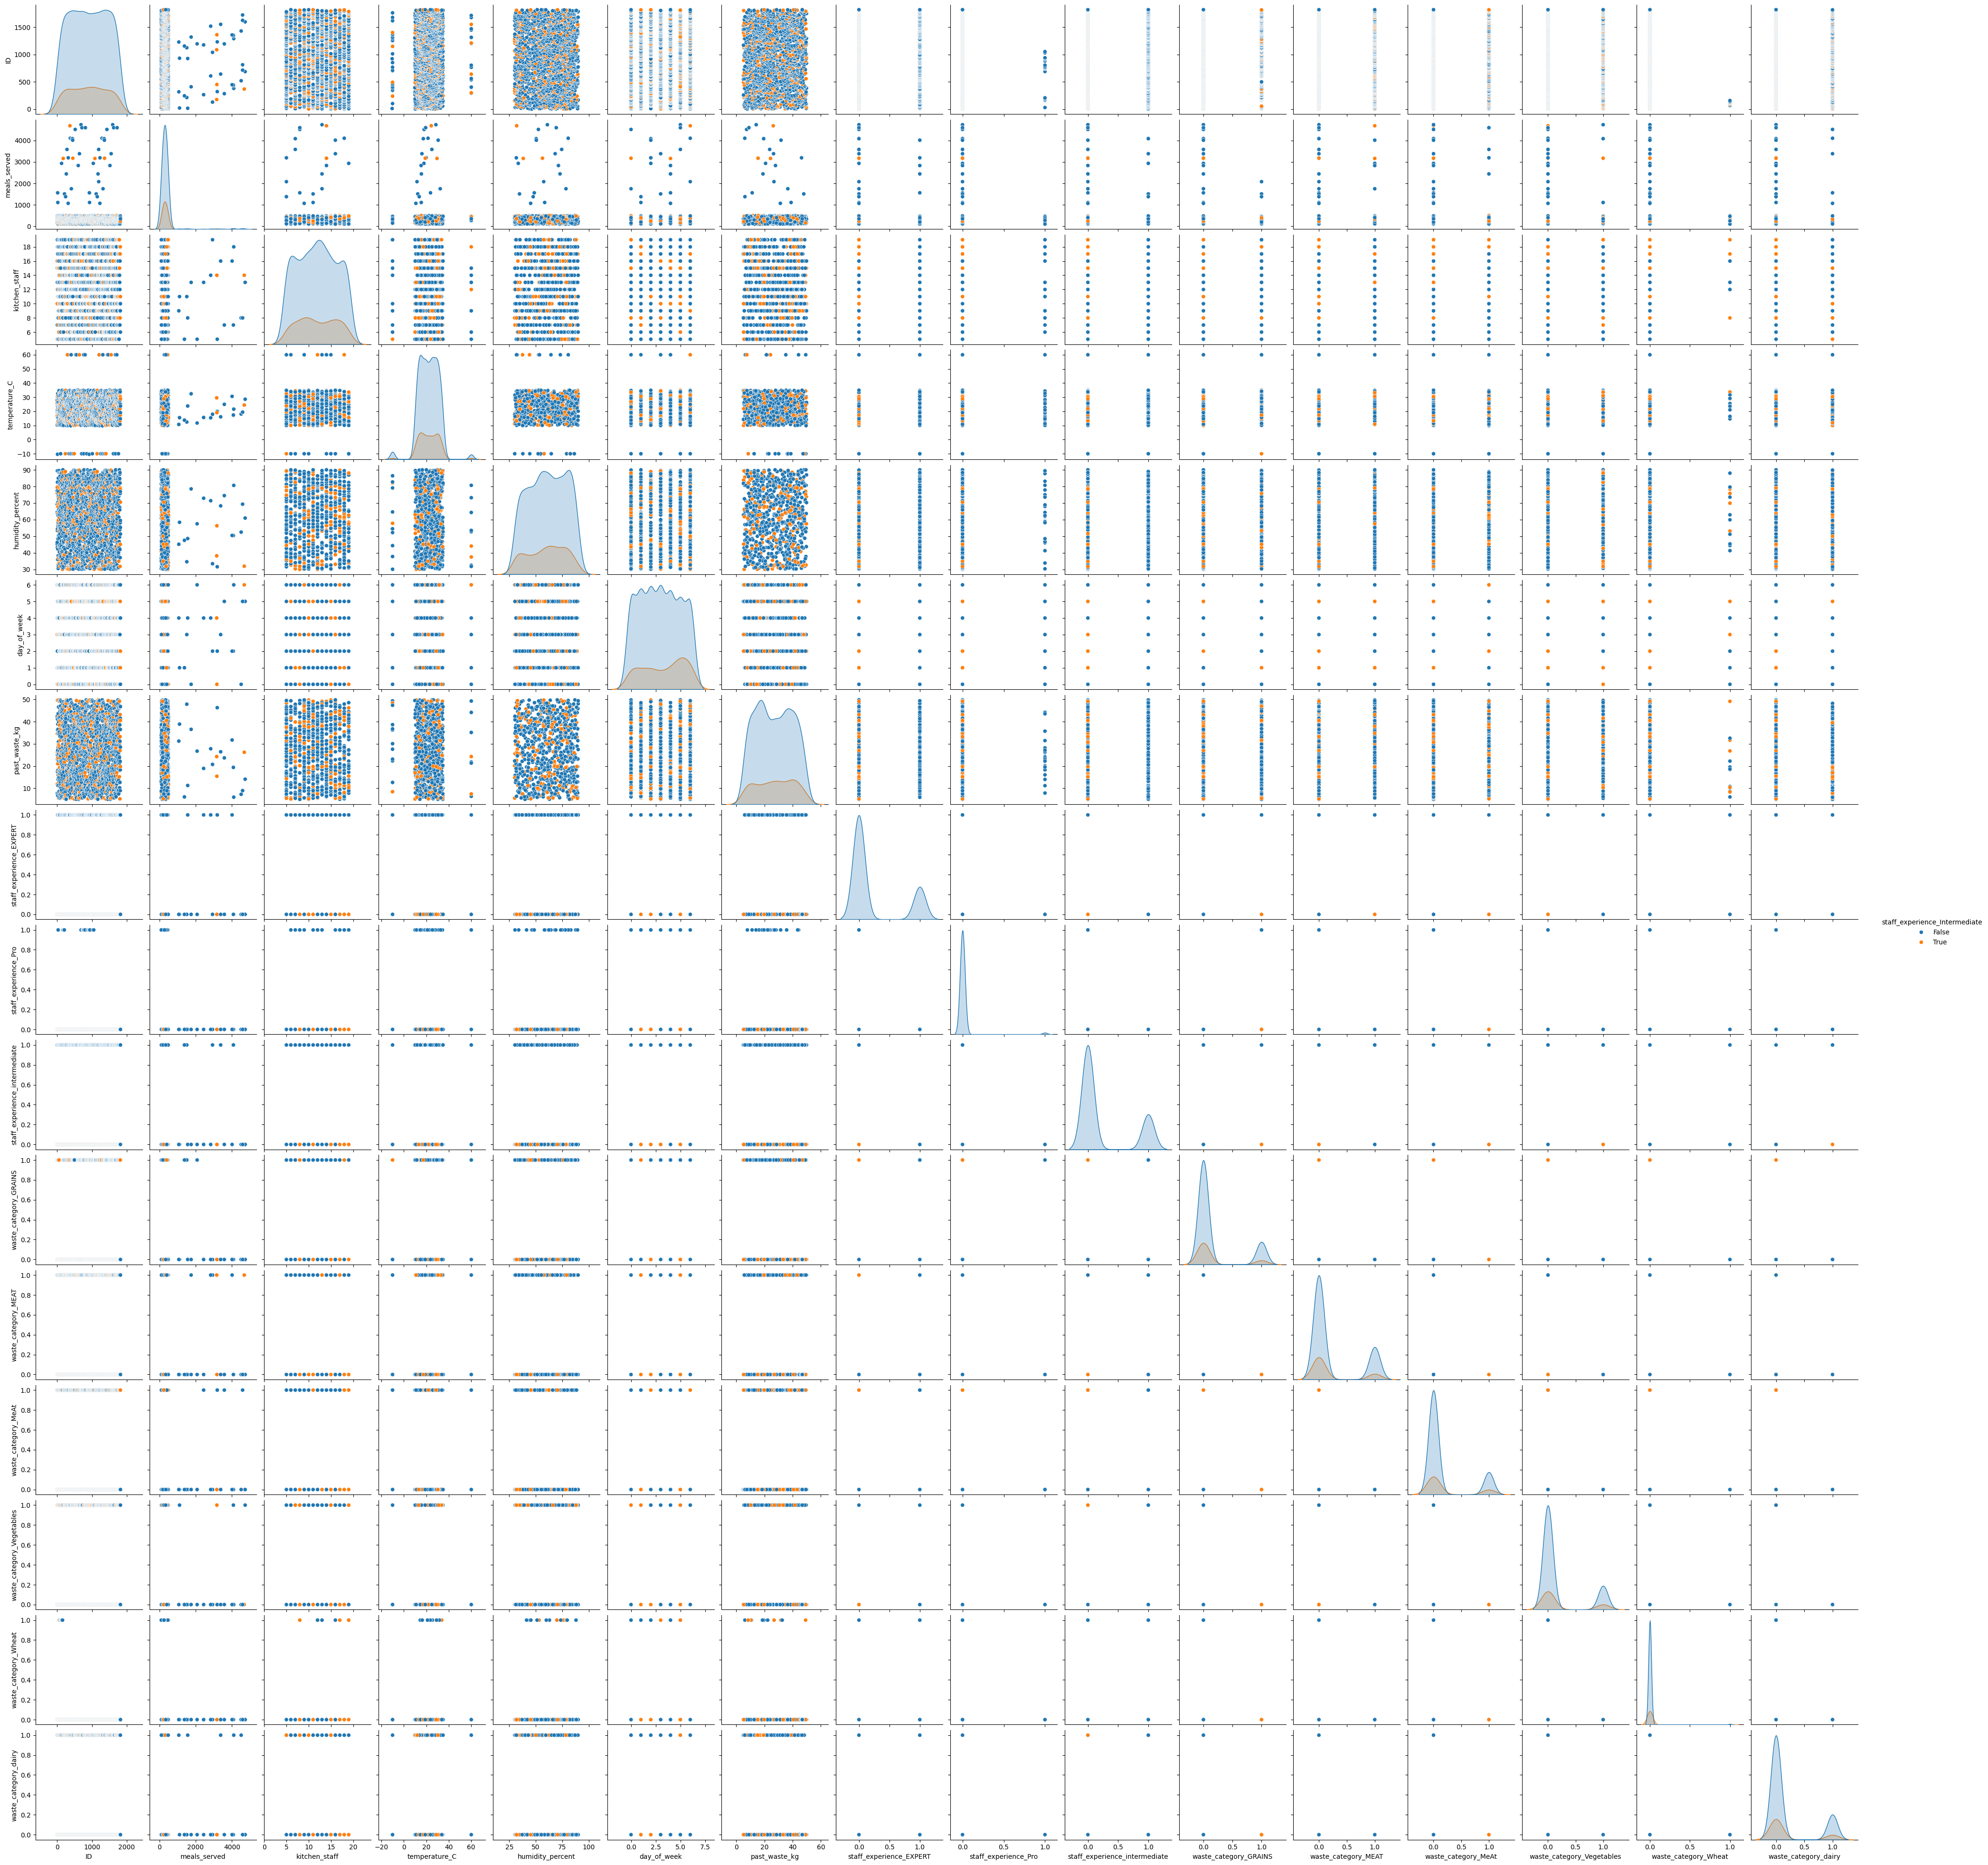

In [ ]:
# Multivariate Analysis: Pairplot
#sns.pairplot(df, hue='staff_experience')  # 'staff_experience' column is no longer present
# Instead, use one of the newly created one-hot encoded columns for hue
# For example, if 'staff_experience_Intermediate' is one of the new columns:
sns.pairplot(df, hue='staff_experience_Intermediate')  # Replace with the actual column name
plt.show()

# Encode categorical features using one-hot encoding
# This line was already executed in the previous cell, no need to run it again
# df = pd.get_dummies(df, columns=['staff_experience', 'waste_category'], drop_first=True)
display(df.head())

# Data Analysis Key Findings:



*   Missing Values: 337 missing values were found in the 'staff_experience' column and 32 missing values were found  in the 'meals_served' column were imputed using the mode and mean.






# Key Insights and Recommendations


Question:
Does temperature or humidity have significant influence on food waste?


*  Answer:
Temperature or  humidity have no significant impact on food waste.




Question:
Is there a correlation between the number of meals served and amount of food waste?


* Answer: No there is no significant  correlation across variables. Fodd waste is not dependent on any environmental factor.
*   Number of staff also are not improving or declining the anmount of meals served.



Stang Optimization: If there is a significant relationship between staff
numbers and food waste, suggest optimal stang levels to minimize waste.



*   Answer: When you will group staff level you will find some relations between low medium and high level staff.


 Environmental Factors: If temperature or humidity aects food waste,
recommend strategies to adjust food preparation based on weather conditions.

Answer: To minimize food waste, adjust preparation and storage based on
temperature and humidity. In warmer, more humid conditions, prioritize shorter cooking times for perishable items, immediate refrigeration, and proper sealing of leftovers. During cooler, drier conditions, explore longer shelf life options and ensure adequate moisture for certain foods.

Event Management: If special events lead to higher food waste, suggest
strategies to better manage food during these times (e.g., pre-planning portion
sizes or reducing food waste through donation).


Answer:
*   It's a great point that special events can sometimes lead to more food waste than usual. Here are some strategies to better manage food during these times, focusing on pre-planning and waste reduction:


1.   Pre-Event Planning & Preparation.
2.   Menu Optimization.
3.   Strategic Portion Sizing.



